# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\Hiroyko\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\api\utils\__init__.py)

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [40]:
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential()
model.add(Input(shape=(784,)))  
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [41]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4351 - loss: 1.6161 - val_accuracy: 0.8978 - val_loss: 0.4875
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6645 - loss: 0.9612 - val_accuracy: 0.9152 - val_loss: 0.3625
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6971 - loss: 0.8519 - val_accuracy: 0.9212 - val_loss: 0.3135
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7208 - loss: 0.7992 - val_accuracy: 0.9272 - val_loss: 0.2780
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.7333 - val_accuracy: 0.9300 - val_loss: 0.2675
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7494 - loss: 0.7154 - val_accuracy: 0.9323 - val_loss: 0.2410
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7564 - loss: 0.6994 - val_accuracy: 0.9365 - val_loss: 0.2432
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7684 - loss: 0.6705 - val_accuracy: 0.

Show the performance of the model

Test score: 0.2538841664791107
Test accuracy: 0.9294999837875366


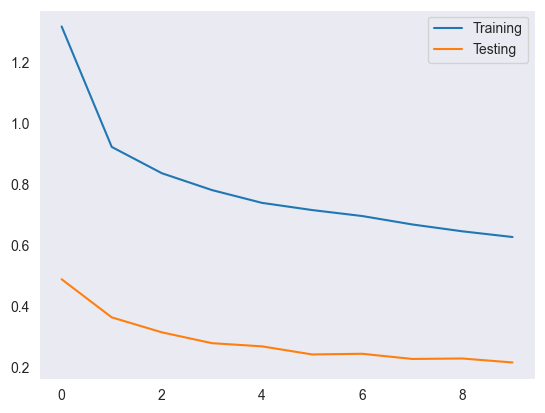

In [42]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


array([[ 956,    0,    3,    1,    0,    9,    4,    3,    3,    1],
       [   0, 1118,    4,    2,    1,    3,    2,    0,    5,    0],
       [  11,    3,  963,   11,    3,    1,    7,    7,   21,    5],
       [   0,    1,   20,  927,    0,   23,    0,   10,   25,    4],
       [   1,    3,    3,    0,  924,    1,   12,    0,    7,   31],
       [   5,    1,    1,   32,    4,  789,   13,    5,   35,    7],
       [   8,    3,    4,    0,    5,    8,  928,    1,    1,    0],
       [   1,   10,   25,    7,    2,    1,    0,  934,    5,   43],
       [   3,   14,    5,   11,   11,   32,    8,   13,  874,    3],
       [   6,    5,    0,   10,   68,   13,    1,   14,   10,  882]],
      dtype=int64)